# Motivación para usar métodos monte-carlo

En un problema que estamos resolviendo con estadística bayesiana, cuando tenemos la posterior $P(\lambda|O)$, donde $\lambda$ representa un parámetro que queremos estimar y $O$ representa las observaciones disponibles, una de las primeras cantidades que queremos calcular es el valor esperado de $\lambda$:

$$
\langle \lambda \rangle = \int \lambda P(\lambda|O) d\lambda.
$$

En casos sencillos esta integral se puede resolver analíticamente, pero en casos más generales se debe hacer de manera numérica.
Si $\lambda$ representa un parámetro unidimensional el cálculo numérico de la integral se puede hacer a través del métodos que discretizan la variable de integración en $N$ puntos para aproximar la integral como la suma de área de polígonos (i.e. el método del trapecio).

Esta metodología no va a funcionar numéricamente para altas dimensiones. Pensemos que tenemos ahora $m$ diferentes dimensiones y discretizamos cada dimensión en $N$ puntos. Esto implicaría evaluar la función a integrar en $N^d$ puntos; con $N=100$ y $d=10$ el problema se vuelve rápidamente incontrolable. La solución a este problema es hacer integración por métodos monte-carlo. 

## Ejemplo 1.1

Pensemos en el ejemplo concreto de la función $f(x)=\exp(x)$ que quisiéramos integrar entre $0\leq x\leq 1$ con métodos Monte Carlo.

En este caso la integral se va a aproximar de la siguiente manera

$$
\int_0^1 \exp(x) dx \approx \frac{x_{\rm max}-x_{\rm min}}{N} \sum_{i=1}^{N} f(x_i) \approx \frac{1}{N} \sum_{i=1}^{N} f(x_i)
$$

Lo interesante del método Monte Carlo de integración es que los $x_i$ no deben estar equiespaciados. Es suficiente con que vengan
de una distribución de probabilidad uniforme entre $x_{\rm min}$ y $x_{\rm max}$.

Comparemos los resultados de la integración por Monte Carlo con el resultado analítico $\int_0^1 \exp(x) dx=e^{1}-1$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return np.exp(x)

def integral_analitica():
    return np.exp(1) - 1

def integral_monte_carlo(N=100):
    x = np.random.random(N)
    return np.sum(f(x))/N


n_intentos = 10
puntos = np.int_(np.logspace(1,5,n_intentos))
diferencias = np.ones(n_intentos)
for i in range(n_intentos):
    a = integral_analitica()
    b = integral_monte_carlo(N=puntos[i])
    diferencias[i] =  (np.abs((a-b)/a))

Text(0,0.5,'Diferencia porcentual Monte Carlo vs. Analitica')

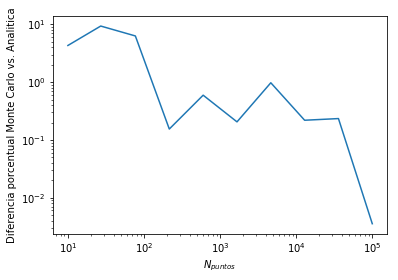

In [4]:
plt.plot(puntos, diferencias*100)
plt.loglog()
plt.xlabel("$N_{puntos}$")
plt.ylabel("Diferencia porcentual Monte Carlo vs. Analitica")

En este ejemplo vemos que si queremos tener una integral con $1\%$ de precisión lo podemos lograr con cerca de $30000$ puntos.

### Ejercicio 1.1

Calcule la integral $\int_0^1 \sin(x)dx$ con el método Monte Carlo y produzca una gráfica como la anterior
donde se muestra la diferencia porcentual entre la solución analítica y numérica como función del número de puntos.

# Integrando con distribuciones no uniformes

En el ejemplo anterior utilizamos puntos que tienen una distribución uniforme para integrar la función exponencial.
En general es posible utilizar puntos que siguen una distribución $g(x)$ para integrar una función $f(x)$.

Escrito en forma de ecuaciones la siguiente identidad es válida

$$
\frac{\int g(x)f(x)dx}{\int g(x)dx} = \langle f(x)\rangle \approx \frac{1}{N}\sum_{i=1}^{N}f(x_i)
$$

donde $g(x)$ representa una distribución de densidad de probabilidad que puede no estar normalizada. Si estuviera normalizada la integral
del denominador sería igual a uno.




# Ejemplo 1.2

Supongamos que queremos calcular la integral $\int_0 ^{\infty} e^{-x} \sin(x) dx$ con el método Monte Carlo.
Para esto sería suficiente generar puntos que sigan la distribución de densidad de probabilidad $e^{-x}$ entre 0 e infinito
y luego calcular el valor promedio de $\sin(x)$ sobre esos puntos.


In [7]:
def f(x):
    return np.sin(x)

def integral_analitica():
    return 0.5

def integral_monte_carlo(N=100):
    x = np.random.exponential(size=N) # esto ya no es una distribucion uniforme!
    return np.sum(f(x))/N


n_intentos = 30
puntos = np.int_(np.logspace(1,5,n_intentos))
diferencias = np.ones(n_intentos) # aqui guardaremos la diferencia entre la sol. numerica y la analitica
for i in range(n_intentos):
    a = integral_analitica()
    b = integral_monte_carlo(N=puntos[i])
    diferencias[i] =  (np.abs((a-b)/a))

Text(0,0.5,'Diferencia porcentual Monte Carlo vs. Analitica')

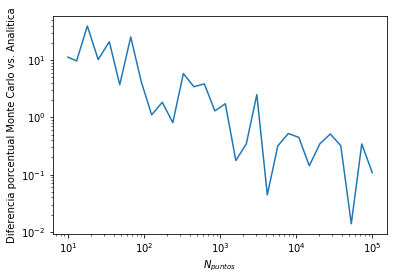

In [8]:
plt.plot(puntos, diferencias*100)
plt.loglog()
plt.xlabel("$N_{puntos}$")
plt.ylabel("Diferencia porcentual Monte Carlo vs. Analitica")

### Ejercicio 1.2

Calcule la integral $\int_0^{\pi/2} x \sin(x)dx$ con un método Monte Carlo y prepare una gráfica similar a la del Ejemplo 1.2.
